In [329]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [330]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [331]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [332]:
def file_get_contents(filename):
    with open(filename) as f:
        return f.read()

In [333]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import json
import re

#file_analyse_name = "ALEXIS PEDRÃO_260001087378"
#file_analyse_name = "MÁRCIO MACEDO_260000958767"
#file_analyse_name = "ALMEIDA LIMA_260000935642"
#file_analyse_name = "DELEGADO PAULO MARCIO_260001037485"
#file_analyse_name = "GEORLIZE_260000835177"
#file_analyse_name = "GILVANI SANTOS_260000935814"
#file_analyse_name = "JURACI NUNES_260000743434"
file_analyse_name = "LÚCIO FLÁVIO_260000857748"
#file_analyse_name = "RODRIGO VALADARES_260001065879"

## Tf-idf com 0
#file_analyse_name = "EDVALDO_260000983413"
#file_analyse_name = "DELEGADA DANIELLE_260000637328"

#file_analyse_name = "EDVALDO_260000983413"
file_json_contents = file_get_contents("./files_parseds/" + file_analyse_name + ".json")
json_data = json.loads(file_json_contents)
content_pages = [re.sub(r'[0-9]', '', content["text"]) for content in json_data["content"]]

In [334]:
stop_words = ["aracaju","de","a","o","que","e","do","da","em","um","para","é", "etc","com","não","uma","os","no","se","na","por","mais","as","dos","como","mas","foi","ao","ele","das","tem","à","seu","sua","ou","ser","quando","muito","há","nos","já","está","eu","também","só","pelo","pela","até","isso","ela","entre","era","depois","sem","mesmo","aos","ter","seus","quem","nas","me","esse","eles","estão","você","tinha","foram","essa","num","nem","suas","meu","às","minha","têm","numa","pelos","elas","havia","seja","qual","será","nós","tenho","lhe","deles","essas","esses","pelas","este","fosse","dele","tu","te","vocês","vos","lhes","meus","minhas","teu","tua","teus","tuas","nosso","nossa","nossos","nossas","dela","delas","esta","estes","estas","aquele","aquela","aqueles","aquelas","isto","aquilo","estou","está","estamos","estão","estive","esteve","estivemos","estiveram","estava","estávamos","estavam","estivera","estivéramos","esteja","estejamos","estejam","estivesse","estivéssemos","estivessem","estiver","estivermos","estiverem","hei","há","havemos","hão","houve","houvemos","houveram","houvera","houvéramos","haja","hajamos","hajam","houvesse","houvéssemos","houvessem","houver","houvermos","houverem","houverei","houverá","houveremos","houverão","houveria","houveríamos","houveriam","sou","somos","são","era","éramos","eram","fui","foi","fomos","foram","fora","fôramos","seja","sejamos","sejam","fosse","fôssemos","fossem","for","formos","forem","serei","será","seremos","serão","seria","seríamos","seriam","tenho","tem","temos","tém","tinha","tínhamos","tinham","tive","teve","tivemos","tiveram","tivera","tivéramos","tenha","tenhamos","tenham","tivesse","tivéssemos","tivessem","tiver","tivermos","tiverem","terei","terá","teremos","terão","teria","teríamos","teriam"]
tfIdfVectorizer=TfidfVectorizer(
    max_df=0.8,
    min_df=0.2,
    stop_words=stop_words,
    use_idf=True,
    ngram_range=(1,2),
    #max_features=100
)
tfIdf = tfIdfVectorizer.fit_transform(content_pages)

In [335]:
# Analisar este caso para a exibição dos idfs 0
df = []
top_ten_sentences_per_page = []

for tf in tfIdf:
  frame = pd.DataFrame(tf.T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
  frame = frame.sort_values('TF-IDF', ascending=False)
  top_ten_sentences = frame.head(10)
  top_ten = pd.DataFrame()
  top_ten['Sentence'] = top_ten_sentences.index
  top_ten['TF-IDF'] = top_ten_sentences['TF-IDF'].tolist()
  top_ten_sentences_per_page.append(top_ten)
  df.append(frame)

print(len(top_ten_sentences_per_page))
print(top_ten_sentences_per_page)

3
[         Sentence    TF-IDF
0           saúde  0.227026
1        educação  0.227026
2         governo  0.115106
3      tratamento  0.113513
4  saúde educação  0.075675
5        crianças  0.075675
6     ultrapassar  0.075675
7           capaz  0.075675
8          pontos  0.075675
9           plano  0.075675,        Sentence    TF-IDF
0  equipamentos  0.151454
1      proteção  0.151454
2    atividades  0.113590
3         outro  0.113590
4       turismo  0.113590
5        guarda  0.113590
6     segurança  0.113590
7     turístico  0.113590
8     municipal  0.086388
9      públicos  0.075727,    Sentence    TF-IDF
0  respeito  0.104397
1     todos  0.104397
2    número  0.104397
3    cidade  0.104397
4   retorno  0.091513
5  garantir  0.091513
6    dentro  0.091513
7     geral  0.091513
8   pessoas  0.091513
9   cuidado  0.091513]


/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/nathanfeitoza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [336]:
sentences_tfidf_no_zero_dictionary = {}
text_database = []

for df_word in df:
    for sentence, row in df_word.iterrows():
        text_instance = {}
        text_instance['sentence'] = sentence
        text_instance['tf-idf'] = row["TF-IDF"]

        if row["TF-IDF"] > 0:
            sentences_tfidf_no_zero_dictionary[sentence] = row["TF-IDF"]
        text_database.append(text_instance)

#print(sentences_tfidf_no_zero_dictionary)
#print(text_database)

In [337]:
tfIdf.shape

(3, 1523)

In [338]:
dataframe_texts =  pd.DataFrame(text_database)
dataframe_texts

,sentence,tf-idf
0,saúde,0.227026
1,educação,0.227026
2,governo,0.115106
3,tratamento,0.113513
4,saúde educação,0.075675
...,...,...
4564,estímulo casa,0.000000
4565,estímulo,0.000000
4566,estudo trabalho,0.000000
4567,estudo jurídico,0.000000


In [339]:
# Imports necessários
from sklearn.cluster import KMeans
from sklearn import metrics

# Variando o número de k de 1 a 10 para analisar os valores da métrica
best_k_with_score = 5
best_score = 0.3

for k in range(2, 10):
  km = KMeans(n_clusters=k,random_state=42)
  km.fit(tfIdf)
  score = metrics.silhouette_score(tfIdf, km.labels_, metric='euclidean')
  if score > best_score:
    best_score = score
    best_k_with_score = k
  print("Para k=%i o valor Silhoutte foi de %.4f" % (k, score))

print("Melhor score: %.4f, então o k deve ser de %i" % (best_score, best_k_with_score))

Para k=2 o valor Silhoutte foi de 0.0043


ValueError: Number of labels is 3. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
km = KMeans(n_clusters=best_k_with_score,random_state=42)
clusters_km = km.fit_predict(tfIdf)
clusters_km

array([4, 4, 1, 1, 1, 3, 3, 4, 4, 2, 1, 1, 1, 2, 4, 4, 0, 0, 2, 2, 2, 2,
       1, 0, 3, 0, 4, 0, 4, 1, 4, 0, 1, 1, 4, 0, 0, 0, 0, 4, 2, 2, 4, 1,
       0, 0, 4, 4], dtype=int32)

In [ ]:
dataframe_texts['clusters_km'] = pd.Series(clusters_km)
dataframe_texts


,sentence,tf-idf,clusters_km
0,acesso,0.0,4.0
1,projetos,0.0,4.0
2,inteligente,0.0,1.0
3,meio,0.0,1.0
4,municipal,0.0,1.0
...,...,...,...
2251,fortalecer,0.0,NaN
2252,gestão,0.0,NaN
2253,implantar,0.0,NaN
2254,implementar,0.0,NaN


In [ ]:
pages_in_clusters = {}
for i in range(0, len(clusters_km)):
  page = i + 1
  cluster = clusters_km[i]

  if cluster in pages_in_clusters:
    pages_in_clusters[cluster].append(page)
  else:
    pages_in_clusters[cluster] = [page] 
  

pages_in_clusters = dict(sorted(pages_in_clusters.items()))
pages_in_clusters

{0: [17, 18, 24, 26, 28, 32, 36, 37, 38, 39, 45, 46],
 1: [3, 4, 5, 11, 12, 13, 23, 30, 33, 34, 44],
 2: [10, 14, 19, 20, 21, 22, 41, 42],
 3: [6, 7, 25],
 4: [1, 2, 8, 9, 15, 16, 27, 29, 31, 35, 40, 43, 47, 48]}

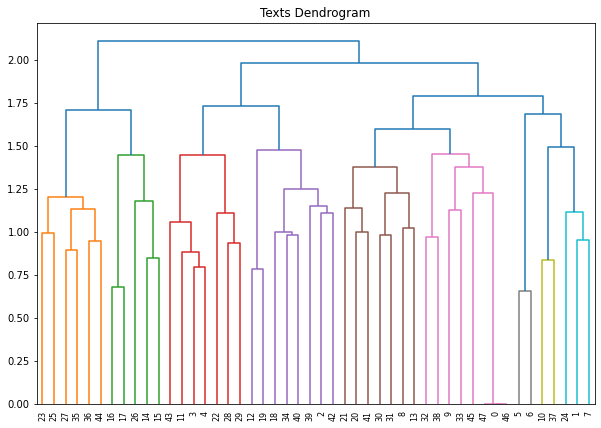

In [ ]:
# Imports necessários
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Criando e plotando o dendrograma
plt.figure(figsize=(10, 7))
plt.title("Texts Dendrogram")
cluster_alg = shc.linkage(tfIdf.toarray(), method='ward',)
dend = shc.dendrogram(cluster_alg)


In [ ]:
# Imports Necessários
from sklearn.cluster import AgglomerativeClustering

# Criação do Cluster
agg_cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
clusters_agg = agg_cluster.fit_predict(tfIdf.toarray())
clusters_agg

array([0, 1, 3, 4, 4, 6, 6, 1, 0, 0, 1, 4, 3, 0, 2, 2, 2, 2, 3, 3, 0, 0,
       4, 5, 1, 5, 2, 5, 4, 4, 0, 0, 0, 0, 3, 5, 5, 1, 0, 3, 3, 0, 3, 4,
       5, 0, 0, 0])

In [ ]:
dataframe_texts['cluster_agg'] = pd.Series(clusters_agg)
dataframe_texts

,sentence,tf-idf,clusters_km,cluster_agg
0,acesso,0.0,4.0,0.0
1,projetos,0.0,4.0,1.0
2,inteligente,0.0,1.0,3.0
3,meio,0.0,1.0,4.0
4,municipal,0.0,1.0,4.0
...,...,...,...,...
2251,fortalecer,0.0,NaN,NaN
2252,gestão,0.0,NaN,NaN
2253,implantar,0.0,NaN,NaN
2254,implementar,0.0,NaN,NaN


In [ ]:
## Limpar valores NaN para 0

dataframe_texts = dataframe_texts.fillna(0)
dataframe_texts

,sentence,tf-idf,clusters_km,cluster_agg
0,acesso,0.0,4.0,0.0
1,projetos,0.0,4.0,1.0
2,inteligente,0.0,1.0,3.0
3,meio,0.0,1.0,4.0
4,municipal,0.0,1.0,4.0
...,...,...,...,...
2251,fortalecer,0.0,0.0,0.0
2252,gestão,0.0,0.0,0.0
2253,implantar,0.0,0.0,0.0
2254,implementar,0.0,0.0,0.0


In [ ]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[40, 20, 33, 34,  8,  7, 29, 21,  4, 32, 23, 35, 37,  1,  5, 15,
        31, 39,  6,  2, 17,  3, 27, 41, 14,  9, 10, 18, 43, 19, 46, 36,
         0, 30, 16, 44, 24, 22, 42, 13, 45, 38, 25, 12, 11, 26, 28],
       [30, 11,  0, 44, 42, 32, 36, 19, 25, 46, 24, 27,  4, 43, 41, 23,
        12,  1, 31,  7,  5, 18,  6, 26, 37, 40, 14, 16, 20, 28, 35,  9,
        45, 38, 21, 39, 15,  2, 13, 33,  8, 22, 34, 10,  3, 29, 17],
       [22,  3, 25, 11, 42, 15, 17, 10, 35, 37, 16, 29, 24, 28, 39, 19,
         1, 14, 32, 46, 20, 33,  5,  7, 26, 44, 41,  6, 12, 23,  8, 27,
        31, 36,  0, 45, 38, 13, 30, 21,  9, 34,  4, 40,  2, 43, 18],
       [ 9, 24,  6, 38, 45, 17, 43, 37, 30, 26, 42, 27,  0, 40, 31,  8,
        21, 10, 33,  1,  7, 20,  2, 39, 34, 36,  5,  4,  3, 13, 11, 12,
        46, 14, 15, 16, 18, 19, 22, 25, 28, 29, 32, 35, 41, 44, 23],
       [13, 28, 19, 45, 43,  2, 41, 20, 40, 38, 12, 33, 30, 32, 36, 11,
        26,  7,  3,  6, 46,  1,  9, 39, 34, 16, 37, 27, 35,  5, 25, 42,
    

In [ ]:
# Criação de uma variável com a lista de palavras que representa as colunas da matriz.
terms = tfIdfVectorizer.get_feature_names_out()

In [ ]:
terms

array(['acesso', 'ampliar', 'assistência', 'através', 'avançar', 'ações',
       'centro', 'compromissos', 'comunidades', 'construção', 'criar',
       'desenvolvimento', 'diretrizes', 'educação', 'empreendedorismo',
       'espaços', 'foco', 'forma', 'fortalecer', 'gestão', 'implantar',
       'implementar', 'incentivar', 'incentivo', 'infraestrutura',
       'inovação', 'inteligente', 'meio', 'municipal', 'parceria',
       'pessoas', 'plano', 'população', 'programa', 'projeto', 'projetos',
       'pública', 'públicos', 'qualidade', 'rede', 'saúde', 'segurança',
       'serviços', 'social', 'transporte', 'vida', 'áreas'], dtype=object)

In [ ]:
centroids = []
# 5 foi o número de clusters que usamos para treinar o modelo do K-Means
for i in range(best_k_with_score):
  list_id = order_centroids[i]
  list_terms = [terms[id] for id in list_id[:10]]
  pages = [str(page) for page in pages_in_clusters[i]]
  centroids.append({'cluster': i, 'words': ', '.join(list_terms), 'pages': pages})

df_centroids = pd.DataFrame(centroids)
df_centroids

,cluster,words,pages
0,0,"saúde, implantar, programa, projeto, comunidad...","[17, 18, 24, 26, 28, 32, 36, 37, 38, 39, 45, 46]"
1,1,"pessoas, desenvolvimento, acesso, transporte, ...","[3, 4, 5, 11, 12, 13, 23, 30, 33, 34, 44]"
2,2,"incentivar, através, inovação, desenvolvimento...","[10, 14, 19, 20, 21, 22, 41, 42]"
3,3,"construção, infraestrutura, centro, qualidade,...","[6, 7, 25]"
4,4,"educação, municipal, gestão, vida, social, ass...","[1, 2, 8, 9, 15, 16, 27, 29, 31, 35, 40, 43, 4..."


In [ ]:
import json 

results_saves = []

for cluster_data in centroids:
  words = cluster_data['words']
  pages = cluster_data['pages']
  content = {'keywords': words, 'pages_relationeds': pages, 'data': []}

  for page_number in pages:
    page_index = int(page_number) - 1
    content['data'].append(content_pages[page_index])
  
  results_saves.append(content)


file = open("./files_analyseds/" + file_analyse_name + ".json", 'w')
file.write(json.dumps(results_saves))
file.close()

In [ ]:
for n in range(5):
  print("Cluster %i: %s" % (n, list(df_centroids[df_centroids['cluster'] == n]['words'][:5])))
  data_selected = dataframe_texts[dataframe_texts['clusters_km'] == n]
  for index, row in data_selected.head(10).iterrows():
    print("sentence: %s" % row['sentence'])
  print()

Cluster 0: ['saúde, implantar, programa, projeto, comunidades, compromissos, parceria, implementar, avançar, população']
sentence: saúde
sentence: segurança
sentence: incentivo
sentence: desenvolvimento
sentence: através
sentence: compromissos
sentence: diretrizes
sentence: incentivar
sentence: educação
sentence: empreendedorismo

Cluster 1: ['pessoas, desenvolvimento, acesso, transporte, serviços, população, pública, gestão, inovação, áreas']
sentence: inteligente
sentence: meio
sentence: municipal
sentence: projeto
sentence: pública
sentence: infraestrutura
sentence: inovação
sentence: ações
sentence: comunidades
sentence: construção

Cluster 2: ['incentivar, através, inovação, desenvolvimento, serviços, espaços, forma, criar, projetos, públicos']
sentence: programa
sentence: públicos
sentence: serviços
sentence: social
sentence: transporte
sentence: vida
sentence: foco
sentence: forma

Cluster 3: ['construção, infraestrutura, centro, qualidade, vida, forma, social, públicos, pessoas

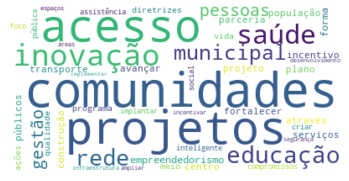

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

if len(sentences_tfidf_no_zero_dictionary) > 0:
  words_cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(sentences_tfidf_no_zero_dictionary)

  plt.imshow(words_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
else:
  print("Sem palavras com TF-IDF diferente de zero")